In [1]:
import sys
import os
from icecream import ic 
import csv
import numpy as np
import more_itertools
import matplotlib.pyplot as plt
  
# current = os.path.dirname(os.path.realpath(__file__))
# parent = os.path.dirname(current)

current = os.curdir
# parent = os.path.dirname(current)
# sys.path.append(parent)
os.chdir("..")

from source.read_amplitudes import read_amplitudes, fix_operator_num_args, get_tree, fix_tree, fix_subscript, fix_subscripts, read_amplitudes_and_squares
  

In [2]:
os.listdir()

['source', 'test', '.pytest_cache', 'dev', '.swp', 'test.txt', 'notebooks']

In [3]:
ampl_folders_prefix = "../QED_AllParticles_IO/out/ampl/"
sqampl_folders_prefix = "../QED_AllParticles_IO/out/sq_ampl/"
amplitudes_folders_names = ["1to2/", "2to1/", "2to2/", "2to3/", "3to2/"] 
amplitudes_folders = [ampl_folders_prefix+a for a in amplitudes_folders_names]
sqamplitudes_folders_names = ["1to2/", "2to1/", "2to2/", "2to3/", "3to2/"] 
sqamplitudes_folders = [sqampl_folders_prefix+a for a in sqamplitudes_folders_names]

In [4]:
amplitudes = dict()
sqamplitudes = dict()
for amplitudes_folder, sqamplitudes_folder, name in zip(amplitudes_folders, sqamplitudes_folders, amplitudes_folders_names):

    amplitudes_files = os.listdir(amplitudes_folder)
    sqamplitudes_files = os.listdir(sqamplitudes_folder)
    # ic(len(amplitudes_files))
    # ic(len(sqamplitudes_files))
    ampl, sqampl = read_amplitudes_and_squares(amplitudes_folder, sqamplitudes_folder)


    ampls_prefix = []
    for exp in ampl:
        tree = get_tree(exp)
        tree = fix_tree(tree)
        final_expr = fix_subscripts(tree)
        ampls_prefix.append(final_expr)

    sqampls_prefix = []
    for exp in sqampl:
        tree = get_tree(exp)
        tree = fix_tree(tree)
        final_expr = fix_subscripts(tree)
        sqampls_prefix.append(final_expr)
    amplitudes[name] = ampls_prefix
    sqamplitudes[name] = sqampls_prefix

In [5]:
np.array(amplitudes["2to2/"][100])

array(['Prod', '-1/2', 'Prod', 'i', 'Prod', 'Pow', 'e', '2', 'Prod',
       'Pow', 'Sum', 'Pow', 'm_mu', '2', 'Sum', 'Prod', '-1', 's_13',
       'Prod', '1/2', 'reg_prop', '-1', 'Prod', 'gamma', 'alpha_0',
       'alpha_1', 'alpha_2', 'Prod', 'gamma', 'alpha_0', 'alpha_4',
       'alpha_3', 'Prod', 't^(*)', 'i_3', 'alpha_1', '(p_2)_v', 'Prod',
       't', 'i_0', 'alpha_2', '(p_4)_v', 'Prod', 'mu^(*)', 'i_1',
       'alpha_4', '(p_1)_v', 'mu', 'i_2', 'alpha_3', '(p_3)_v'],
      dtype='<U8')

In [6]:
np.array(sqamplitudes["2to2/"][100])

array(['Prod', '1/4', 'Prod', 'Pow', 'e', '4', 'Prod', 'Sum', 'Prod',
       '16', 'Prod', 'Pow', 'm_t', '2', 'Pow', 'm_mu', '2', 'Sum', 'Prod',
       '-8', 'Prod', 'Pow', 'm_t', '2', 's_13', 'Prod', '8', 'Prod',
       's_14', 's_23', 'Prod', '-8', 'Prod', 'Pow', 'm_mu', '2', 's_24',
       'Prod', '8', 'Prod', 's_12', 's_34', 'Pow', 'Sum', 'Pow', 'm_mu',
       '2', 'Sum', 'Prod', '-1', 's_13', 'Prod', '1/2', 'reg_prop', '-2'],
      dtype='<U8')

In [7]:
ampls_lengths = [[len(a) for a in amplitudes[key]] for key in amplitudes.keys()]
sqampls_lengths = [[len(a) for a in sqamplitudes[key]] for key in amplitudes.keys()]

for i, key in enumerate(amplitudes.keys()):
    print(key+"amplitudes mean length:", np.mean(ampls_lengths[i]), "sqampl: ", np.mean(sqampls_lengths[i]));

1to2/amplitudes mean length: 25.0 sqampl:  13.0
2to1/amplitudes mean length: 25.0 sqampl:  13.0
2to2/amplitudes mean length: 57.21052631578947 sqampl:  60.175438596491226
2to3/amplitudes mean length: 178.97619047619048 sqampl:  763.1919642857143
3to2/amplitudes mean length: 170.40178571428572 sqampl:  656.6785714285714


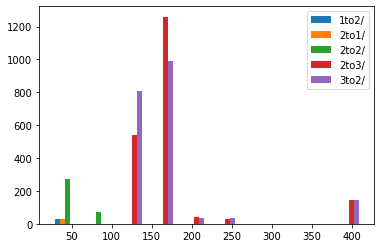

In [8]:
plt.hist(ampls_lengths, label=amplitudes_folders_names, bins=10);
plt.legend();

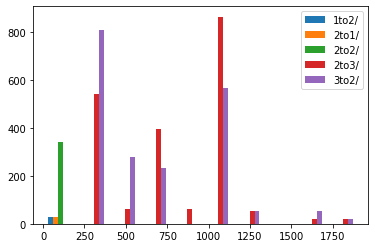

In [9]:
plt.hist(sqampls_lengths, label=sqamplitudes_folders_names, bins=10);
plt.legend();